In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [45]:
prices_csv = '/content/rice_beef_coffee_price_changes.csv'
prices = pd.read_csv(prices_csv)

In [59]:
print(f"Number of entries: {prices.shape[0]}")
print(f"Feature names: {prices.columns.tolist()}")


print(prices.describe())
print(prices.info())

Number of entries: 360
Feature names: ['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate', 'Price_rice_infl', 'Price_beef_infl', 'Price_coffee_infl']
              Year  Price_beef_kilo  Price_rice_kilo  Price_coffee_kilo  \
count   360.000000       360.000000       360.000000         360.000000   
mean   2006.583333         3.152056         0.364083           2.999722   
std       8.671906         1.167673         0.131201           1.164001   
min    1992.000000         1.630000         0.160000           1.170000   
25%    1999.000000         2.117500         0.260000           2.265000   
50%    2007.000000         2.730000         0.345000           2.940000   
75%    2014.000000         4.220000         0.440000           3.605000   
max    2022.000000         6.170000         0.910000           6.620000   

       Inflation_rate  Price_rice_infl  Price_beef_infl  Price_coffee_infl  
count      347.000000       347.000000       347.000000

In [60]:
prices.head()

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46


<Axes: xlabel='Year', ylabel='Price_coffee_kilo'>

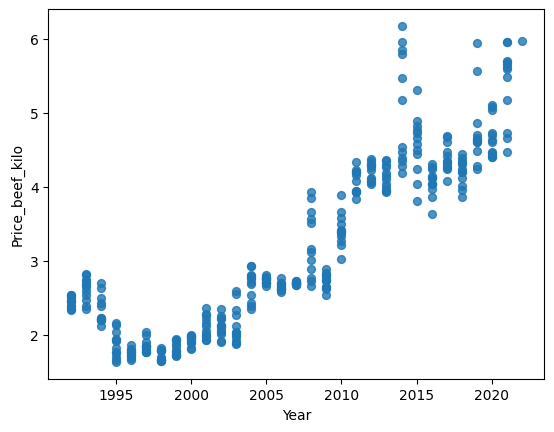

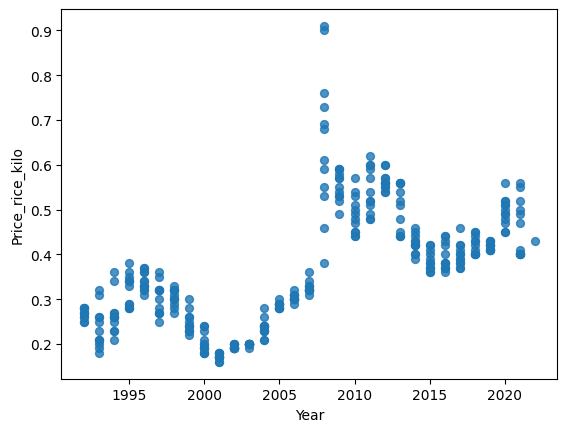

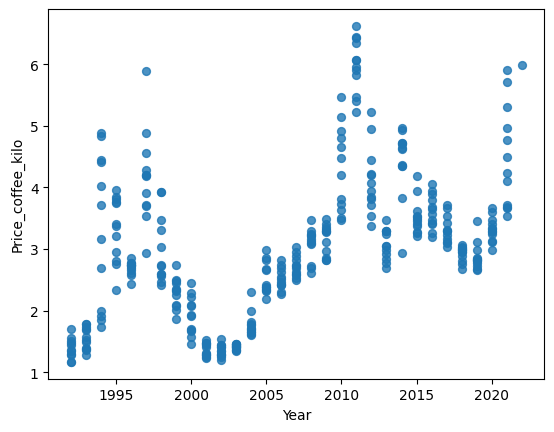

In [62]:
prices.plot(kind='scatter', x='Year', y='Price_beef_kilo', s=32, alpha=.8)
prices.plot(kind='scatter', x='Year', y='Price_rice_kilo', s=32, alpha=.8)
prices.plot(kind='scatter', x='Year', y='Price_coffee_kilo', s=32, alpha=.8)

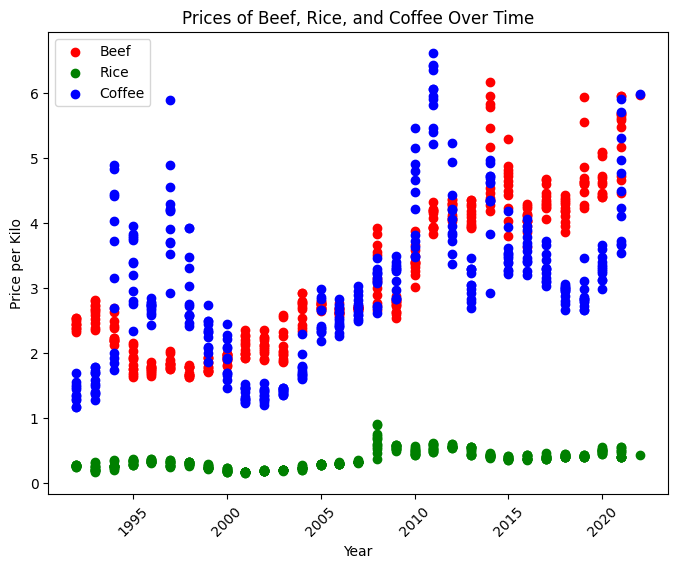

In [98]:
plt.figure(figsize=(8, 6))

# Scatter plot for Beef
plt.scatter(prices['Year'], prices['Price_beef_kilo'], color='red', marker='o', label='Beef')

# Scatter plot for Rice
plt.scatter(prices['Year'], prices['Price_rice_kilo'], color='green', marker='o', label='Rice')

# Scatter plot for Coffee
plt.scatter(prices['Year'], prices['Price_coffee_kilo'], color='blue', marker='o', label='Coffee')

plt.xlabel('Year')
plt.ylabel('Price per Kilo')
plt.title('Prices of Beef, Rice, and Coffee Over Time')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [97]:
X = prices[['Year']]
y = prices['Price_rice_kilo']

model = LinearRegression()
model.fit(X, y)

fitted = model.predict(X)

RMSE = np.sqrt(mean_squared_error(y, fitted))
r2 = r2_score(y, fitted)
print(f'Rice')
print(f'b0 (intercept) = {model.intercept_}')
print(f'b1 (coefficient) = {model.coef_[0]}')
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

X = prices[['Year']]
y = prices['Price_beef_kilo']

model = LinearRegression()
model.fit(X, y)

fitted = model.predict(X)

RMSE = np.sqrt(mean_squared_error(y, fitted))
r2 = r2_score(y, fitted)
print(f'Beef')
print(f'b0 (intercept) = {model.intercept_}')
print(f'b1 (coefficient) = {model.coef_[0]}')
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

X = prices[['Year']]
y = prices['Price_coffee_kilo']

model = LinearRegression()
model.fit(X, y)

fitted = model.predict(X)

RMSE = np.sqrt(mean_squared_error(y, fitted))
r2 = r2_score(y, fitted)
print(f'Coffee')
print(f'b0 (intercept) = {model.intercept_}')
print(f'b1 (coefficient) = {model.coef_[0]}')
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

Rice
b0 (intercept) = -18.196487329073687
b1 (coefficient) = 0.009249837947958148
RMSE = 0.1036795924824946
r2 = 0.3737873345675876
Beef
b0 (intercept) = -235.53740219773434
b1 (coefficient) = 0.11895317467666759
RMSE = 0.5463812615252769
r2 = 0.7804381188382867
Coffee
b0 (intercept) = -122.58451026329601
b1 (coefficient) = 0.06258610365157269
RMSE = 1.028292293583344
r2 = 0.21740941045822948


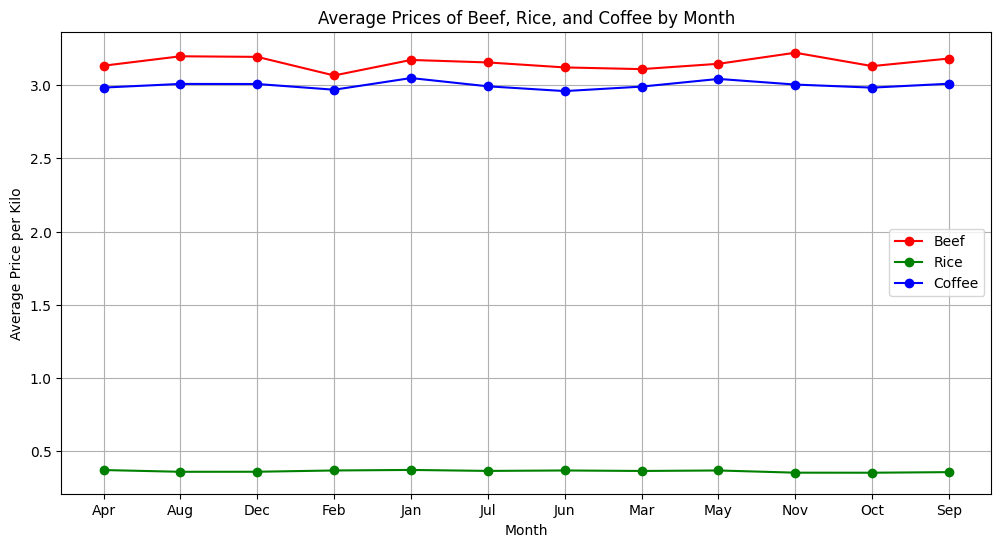

In [92]:

average_prices = prices.groupby('Month').mean()


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(average_prices.index, average_prices['Price_beef_kilo'], marker='o', label='Beef', color='red')
ax.plot(average_prices.index, average_prices['Price_rice_kilo'], marker='o', label='Rice', color='green')
ax.plot(average_prices.index, average_prices['Price_coffee_kilo'], marker='o', label='Coffee', color='blue')

ax.set_xlabel('Month')
ax.set_ylabel('Average Price per Kilo')
ax.set_title('Average Prices of Beef, Rice, and Coffee by Month')
ax.legend()

plt.grid(True)
plt.show()

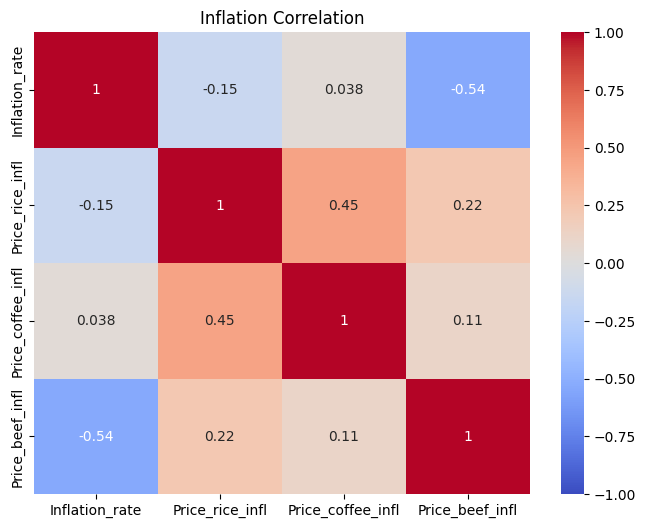

In [96]:
correlation= prices[['Inflation_rate', 'Price_rice_infl', 'Price_coffee_infl', 'Price_beef_infl']]

correlation_matrix = correlation.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Inflation Correlation')
plt.show()